In [17]:
import numpy as np
import pandas as pd

In [18]:
df=pd.read_csv('PlayTennis.csv')

In [19]:
print(df.shape)
df.head()

(14, 5)


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [20]:
y =df['Play Tennis']
x=df.drop(['Play Tennis'],axis='columns')

In [21]:
from sklearn.preprocessing import LabelEncoder
le_outlook= LabelEncoder()
le_temperature= LabelEncoder()
le_humidity= LabelEncoder()
le_wind= LabelEncoder()

In [22]:
x['outlook_new']=le_outlook.fit_transform(x['Outlook'])
x['temperature_new']=le_temperature.fit_transform(x['Temperature'])
x['humidity_new']=le_humidity.fit_transform(x['Humidity'])
x['wind_new']=le_wind.fit_transform(x['Wind'])

In [23]:
x=x.drop(['Outlook','Temperature','Humidity','Wind'],axis='columns')

In [24]:
x

,outlook_new,temperature_new,humidity_new,wind_new
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [25]:
new_names = {
    'outlook_new':'Outlook',
    'temperature_new':'Temperature',
    'humidity_new':'Humidity',
    'wind_new':'Wind'
}
x=x.rename(columns=new_names)
x

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [26]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Tennis, dtype: object

In [27]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model=DecisionTreeClassifier()

In [28]:
model.fit(x,y)

DecisionTreeClassifier()

In [29]:
model.score(x,y)

1.0

In [30]:
model.predict([[2,2,1,0]])

/Users/rishijaiswal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [31]:
model.predict([[1,1,0,0]])

/Users/rishijaiswal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [33]:
# to get the name of all independent features
ind_feature_name=x.columns.tolist()
cls_name=y.unique().tolist()

the plot_tree() fucntion in python is a function that is used to visualize the decision tree structure that is generated by
the decision tre algorighm. The function takes in a decision tree object as an input and returns a matplotlib figure object 
that contains the visualization of the decision tree.

[Text(0.4444444444444444, 0.9, 'node #0\nOutlook <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = Yes'),
 Text(0.3333333333333333, 0.7, 'node #1\ngini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.5555555555555556, 0.7, 'node #2\nHumidity <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = No'),
 Text(0.3333333333333333, 0.5, 'node #3\nOutlook <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No'),
 Text(0.2222222222222222, 0.3, 'node #4\nWind <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.1111111111111111, 0.1, 'node #5\ngini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.3333333333333333, 0.1, 'node #6\ngini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4444444444444444, 0.3, 'node #7\ngini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.7777777777777778, 0.5, 'node #8\nWind <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(0.6666666666666666, 0.3, 'node #9\nOutlook <=

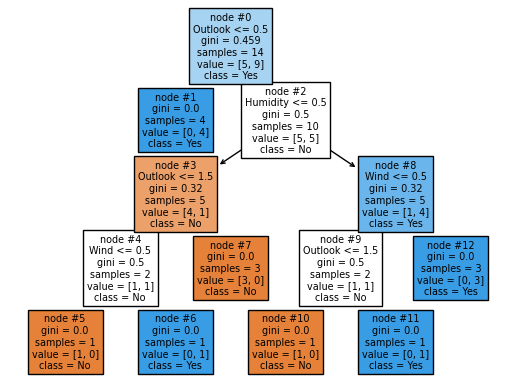

In [34]:
plot_tree(model, filled=True, max_depth=None,node_ids=True, feature_names=ind_feature_name,class_names=cls_name)